# Оглавление
   [Шаг 4. Аналитика средствами Python. Введение](#0)
   
1. [Импортирование файлов](#1)

2. [Изучение данных и проверка на корректность ](#2)

3. [Модели самолётов и количество рейсов](#3)

4. [Топ-10 городов по количеству рейсов](#4)

5. [Cреднее количество рейсов по городам ](#5)

6. [Выводы](#6)


# Шаг 4. Аналитика средствами Python. Введение 
<a name="шаг-0"></a>

Шаг 4 является частью проекта по исследованию для российской авиакомпании «F9», выполняющей сотни внутренних пассажирских авиаперевозок  каждый день. В рамках проекта важно понять предпочтения пользователей, покупающих билеты на те или иные направления. Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
Первый шаг представлял собой написание парсера для сбора с сайта данных о 10 крупнейших фестивалях 2018 года.
Анализ по второму и третьему шагам был произведён с использованием  SQL.

**Задачи:**  

1. импортирование файлов;
2. изучение данных;
3. проверка типов данных на корректность;
4. топ-10 городов по количеству рейсов;
5. построение графиков: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
6. выводы по каждому из графиков с пояснением результата


**Объект исследования:** файлы в формате csv, в которых содержатся результаты запросов из предыдущих заданий.
- Первый датасет - query_1 — результат первого запроса. В нём содержится информация о:
    - model — модели самолета
    - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
- Второй  датасет - query_3 — результат третьего запроса. В нём содержится информация о:
    - city — городах
    - average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года


# 1. Импортирование файлов<a name="1"></a>

In [1]:
import pandas as pd #загружаем все необходимые библиотеки
import numpy as np
from matplotlib import pyplot as plt


try:
    df1 = pd.read_csv('/datasets/query_1.csv') #загружаем результаты запросов
    df3 = pd.read_csv('/datasets/query_3.csv')
except:
    df1 = pd.read_csv('C:/Users/Larissa Olifirova/Desktop/Яндекс практикум/5.Сбор и Хранение информации/query_1.csv')
    df3 = pd.read_csv('C:/Users/Larissa Olifirova/Desktop/Яндекс практикум/5.Сбор и Хранение информации/query_3.csv')


# 2. Изучение данных и проверка на корректность <a name="2"></a>

In [2]:
df1.info() #смотрим как занесены данные 
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df3.info() 
df3.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
3,Архангельск,5.354839
29,Киров,6.000000
75,Ставрополь,2.000000
1,Анадырь,1.000000
43,Москва,129.774194
32,Краснодар,3.903226
17,Геленджик,2.590909
40,Махачкала,3.290323
8,Благовещенск,1.000000
28,Кемерово,2.000000


In [4]:
df3['city'].value_counts(dropna=False).sort_values()

Сыктывкар     1
Белоярский    1
Иваново       1
Саратов       1
Пенза         1
             ..
Брянск        1
Махачкала     1
Нарьян-Мар    1
Якутск        1
Киров         1
Name: city, Length: 101, dtype: int64

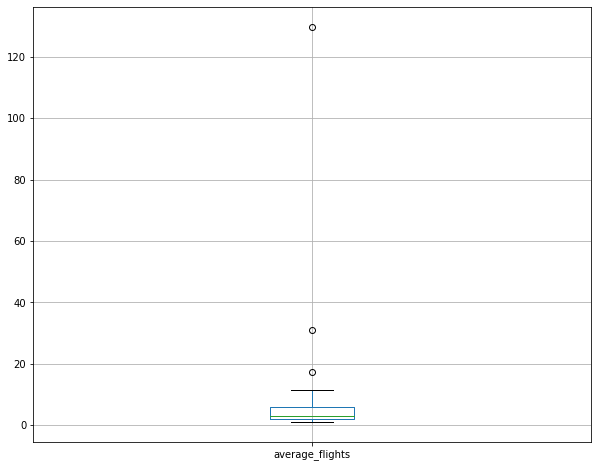

In [5]:
df3.boxplot(column='average_flights', figsize=(10, 8)) #проверим распределение данных
plt.show()

In [6]:
mediana=df3['average_flights'].median()

In [7]:
mediana

3.0

В обеих таблицах отстутствуют пропущенные значения. Типы данных указаны в необходимых для анализа форматах. 

В таблицах отстутствуют дубликаты: в таблице по среднему количеству рейсов города предоставлены  без повторов. 
Таблицы не связаны. 
Данные представлены для различных периодов времени: август 2018 - среднее количестве рейсов, прибывающих в город city за день   и сентябрь 2018 - количество рейсов для каждой модели самолетов model. 

Диаграмма   размаха показывает, что  по среднему количеству рейсов, прибывающих в город, лидируют Москва (выброс на диаграмме размаха), где  максимальное значение составляет 129,8 рейсов в сутки и с большим отрывом Санкт-Петербург с 31,2 рейсами в сутки.


# 3. Модели самолётов и количество рейсов <a name="3"></a>

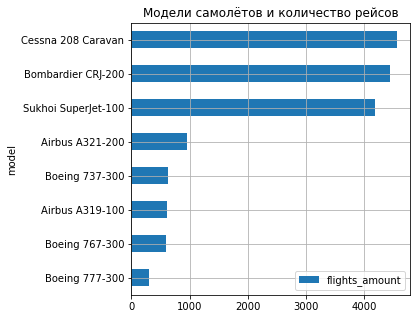

In [8]:
df1.sort_values(by='flights_amount').plot(x='model', kind='barh', grid=True, figsize=(5, 5),\
                                          title='Модели самолётов и количество рейсов')

Лидерами по числу рейсов в авиакомпании в сентябре 2018 года являются Cessna 208 Caravan - 4557 рейсов, Bombardier CRJ-200	- 4446 рейсов и Sukhoi SuperJet-100	 - 4185 рейсов. 
Эти модели относятся к небольшим, узкофюзеляжным машинам и применяются для обслуживания коротких маршрутов:

*Cessna 208 Caravan* - лёгкий турбовинтовой одномоторный самолёт с неубирающимся шасси, способный перевозить до 9 пасажиров на малые расстояния.

*Bombardier CRJ-200* - узкофюзеляжный самолет, способный выполнять рейсы в сложных метеоусловиях, что немаловажно в суровых зимних условиях России. Салон вмещает в себя 50 кресел.

*Sukhoi SuperJet-100* - среднемагистральный узкофюзеляжный самолёт, предназначенный для перевозки до 108 пассажиров на дальность до 4600 км.

Диаграмма показывает, что наибольшей популярностью в авиакомпании F9 пользуются малочисленные рейсы на относительно небольшие расстояния. 

Что следовало бы уточнить:
Мы располагаем данными по количеству самолётов (данные для тренажёра), откуда   видим, что именно эти три лидера по числу рейсов представлены в парке в следующем количестве: Cessna -1200, Bombardier -2700 и Сухой - 3000 бортов.
Данные по количеству самолётов  в парке авиакомпнаии F9  выглядят завышенными особенно на примере American Airlines, самой большой авиакомпании мира, чей флот насчитывает 950 самолетов. 
Исходя из этого можно усомниться и в корректности данных по числу рейсов в месяц. Но если принять имеющиеся данные за истинные, то в одни сутки только для Cessna было сделано  более 150 вылетов, что вполне приемлемо с учётом того, что самолёт способен сделать в сутки до трех пар полётов.


# 4. Топ-10 городов по количеству рейсов <a name="4"></a>

In [9]:
flights = df3.pivot_table(index='city', values='average_flights', aggfunc='sum').\
sort_values(by='average_flights', ascending=False).reset_index()
top10 = flights.loc[0:9]

In [10]:
top10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


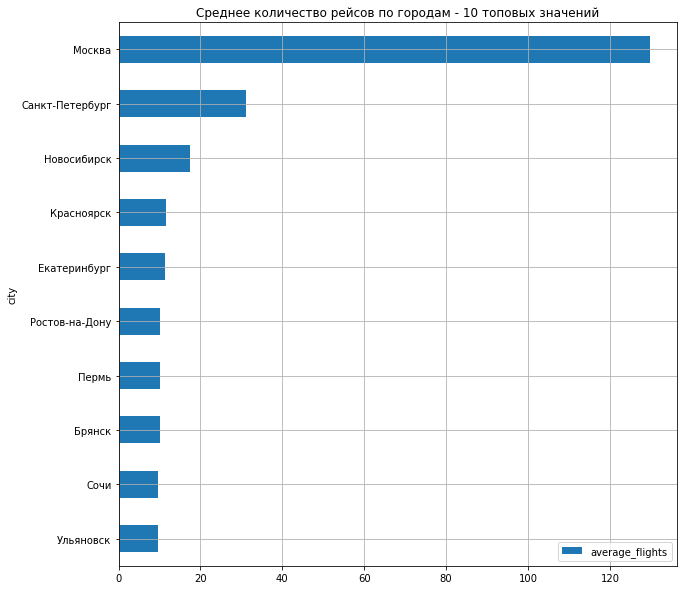

In [11]:
top10.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 10),\
    title='Cреднее количество рейсов по городам - 10 топовых значений');

# 5. Cреднее количество рейсов по городам <a name="5"></a>

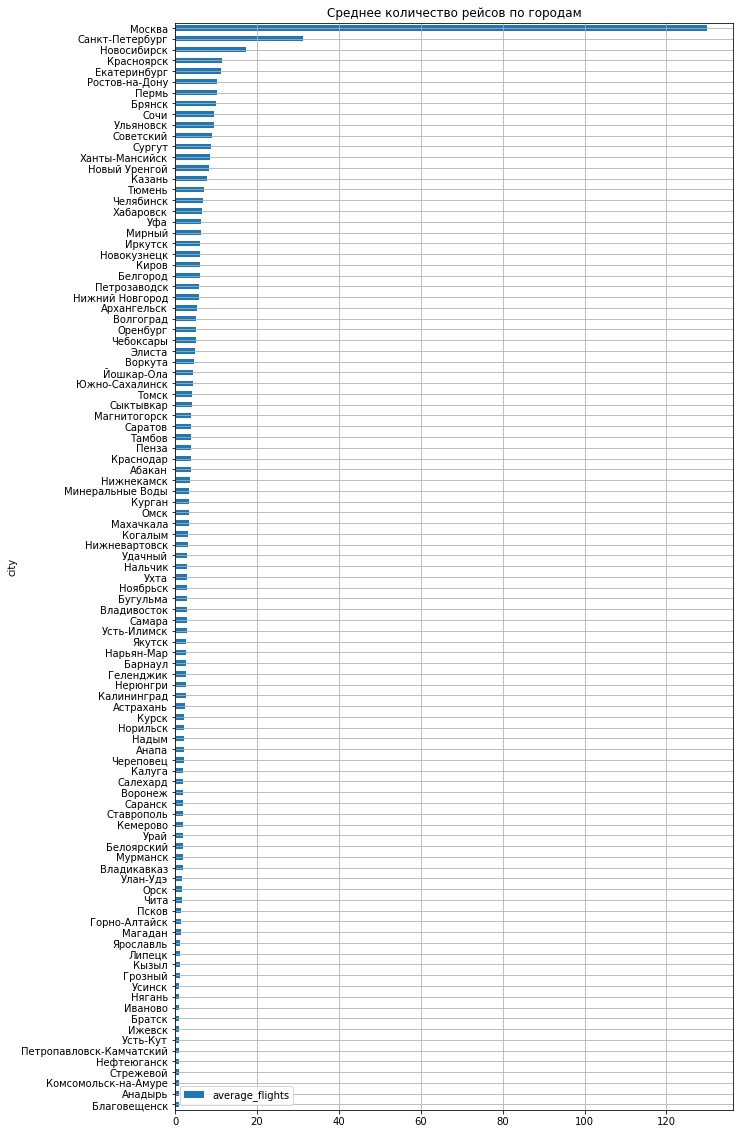

In [12]:
df3.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 20),\
    title='Cреднее количество рейсов по городам');

# 6. Выводы<a name="6"></a>

Диаграмма "Среднее количество рейсов по городам" и диаграмма размаха показывают, что по среднему количеству рейсов, прибывающих в город, лидируют Москва (выброс на диаграмме размаха), где максимальное значение составляет 129,8 рейсов в сутки и с большим отрывом Санкт-Петербург с 31,2 рейсами в сутки.